In [1]:
import torch

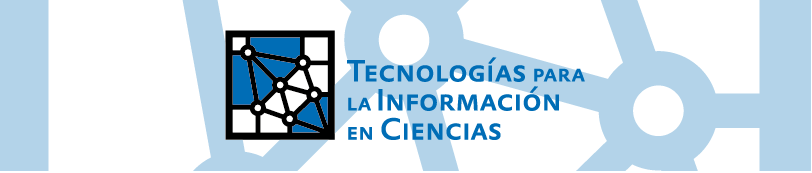  

Zamorano Presa Miguel Ángel

# Tarea pytorch, parte A

Recuerda que no se vale utilizar la palabra `for`.

1. Encuentra la derivada de $x^2 + 2x + 5$ evaluada en $x = 1$ (con pytorch).
2. ¿Para qué sirve squeeze y unsqueeze? ¿Qué recomiendo usar en vez de unsqueeze?
3. Si tengo una matriz `A` de $8\times 10$, ¿de qué tamaño será `A[1:6,-2:]`?
4. Sea $A$ una matriz de $2\times n$. Súmale 10 al primer renglón y 20 al segundo renglón. Escribe poquito.
5. Crea una matriz de $n\times m$ donde en la entrada $(i,j)$ esté el número $i+j$. No se vale usar la palabra `for`. Con `arange` e indizar.
6. Dado dos tensores lineales de tamaño $n\times 2$ y $m \times 2$ respectivamente, crea una matriz de $n\times m$ en donde la entrada $(i,j)$ sea la distancia euclideana entre el punto $i$ del primero tensor y el punto $j$ del segundo tensor. Igual, la palabra `for` está prohibida.
7. Dado una matriz $A$ de $n\times m$ y un vector de enteros $b$ donde todos los números de $b$ van del 0 a m, selecciona los números en las columnas correspondientes a $b$ y ponlos como $-1$. Por ejemplo, si

$$A = \begin{bmatrix}
        0 & 1 & 2 & 3 \\
        4 & 5 & 6 & 7 \\
      \end{bmatrix}$$
y $b = [2, 0]$, entonces debe resultar en:

$$A = \begin{bmatrix}
        0 & 1 & -1 & 3 \\
        -1 & 5 & 6 & 7 \\
      \end{bmatrix}$$
      
8. (**difícil**) Implementa, sin usar `@` ni matmul, multiplicación de matrices. Se vale usar `*`, `+`, `sum` y broadcasting.

In [68]:
#1
def f(x):
    return x**2 + 2*x + 5

x = 1
x = torch.tensor(x, requires_grad=True, dtype=torch.float16)
y=f(x)
y.backward()
print(x.grad)


tensor(4., dtype=torch.float16)


2. Squeeze elimina dimensiones de tamaño 1 tamientras que unsqueze las agrega y ambas tienen sus metodos respectivos el normal qu ehace una copia del tensor y el inplaace con _,el profe recomienda el uso de una sintaxis utilizando None en la posición donde desees agregar la dimensión del estilo A[:,None]

In [61]:
"""
3. Si tengo una matriz A de 8×10, ¿de qué tamaño será A[1:6,-2:]?
"""
A=torch.ones(8,10)
A[1:6,-2:].shape

torch.Size([5, 2])

In [62]:
"""
4. Sea 𝐴 una matriz de 2×𝑛. Súmale 10 al primer renglón y 20 al segundo renglón.
"""
n =3 #arbitrario
A = torch.rand(2, n)
A[0] += 10
A[1] += 20
A

tensor([[10.5609, 10.4801, 10.3104],
        [20.8912, 20.7639, 20.3635]])

In [63]:
"""
5. Crea una matriz de 𝑛×𝑚 donde en la entrada (𝑖,𝑗) esté el número 𝑖+𝑗. No se vale usar la palabra for. Con arange e indizar.
"""
#elejimos valores para nuestras variables
n = 5
m = 3


A = torch.arange(n)
B = torch.arange(m)
A=A[:,None]

print(A.shape)
print(B.shape)
result_matrix = A+B
print(result_matrix)
print(result_matrix.shape)



torch.Size([5, 1])
torch.Size([3])
tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5],
        [4, 5, 6]])
torch.Size([5, 3])


In [64]:
"""
6. Dado dos tensores lineales de tamaño 𝑛×2 y 𝑚×2 respectivamente, crea una matriz de 𝑛×𝑚 en donde la entrada (𝑖,𝑗) sea la distancia euclideana entre el punto 𝑖 del primero tensor y el punto 𝑗 del segundo tensor. Igual, la palabra for está prohibida.
"""
n = 2
m = 2

B = torch.rand(n, 2)
C = torch.rand(m, 2)
print(B)
print(C)
C = C[:,None]
print("-------")
print(C)
dif_p_p = (B - C) ** 2
print(dif_p_p)
print("matriz de distancias: ")
dist = torch.sqrt(torch.sum(dif_p_p,dim=2 ))

print(dist)

tensor([[0.4578, 0.3454],
        [0.8063, 0.7496]])
tensor([[0.6742, 0.6931],
        [0.7719, 0.0695]])
-------
tensor([[[0.6742, 0.6931]],

        [[0.7719, 0.0695]]])
tensor([[[0.0468, 0.1209],
         [0.0175, 0.0032]],

        [[0.0987, 0.0761],
         [0.0012, 0.4624]]])
matriz de distancias: 
tensor([[0.4096, 0.1437],
        [0.4180, 0.6809]])


In [65]:
def mul(A, B):

    mul = A[:, None] * B.T #multi por broadcasting
    result = torch.sum(mul, dim=2) #de modo que cada i,j es la suma de sus respectivos

    return result

# Ejemplo
A =torch.randint(1,9,(2,2))
B =torch.randint(1,9,(2,2))
print(A)
print(B)
print(B.T)
print()

result = mul(A, B)
print(result)

tensor([[4, 3],
        [8, 2]])
tensor([[5, 8],
        [6, 7]])
tensor([[5, 6],
        [8, 7]])

tensor([[38, 53],
        [52, 78]])
